In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**Exercise**

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 

In [3]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
x = iris.data[2:,2:]

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df = pd.DataFrame(x , columns=["petal length (cm)","petal width (cm)"])
df.head()

,petal length (cm),petal width (cm)
0,1.3,0.2
1,1.5,0.2
2,1.4,0.2
3,1.7,0.4
4,1.4,0.3


Text(0, 0.5, 'petal width (cm)')

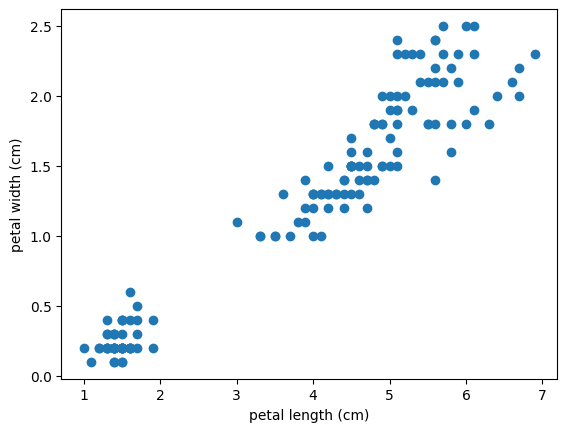

In [7]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [8]:
km = KMeans(n_clusters = 2, n_init='auto')
y_pred = km.fit_predict(df[["petal length (cm)","petal width (cm)"]])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [9]:
df["cluster"] = y_pred
df.head()

,petal length (cm),petal width (cm),cluster
0,1.3,0.2,0
1,1.5,0.2,0
2,1.4,0.2,0
3,1.7,0.4,0
4,1.4,0.3,0


In [10]:
km.cluster_centers_

array([[1.49591837, 0.26530612],
       [4.92525253, 1.68181818]])

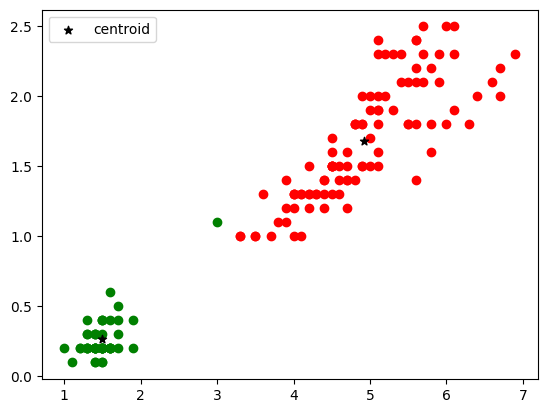

In [11]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1["petal length (cm)"],df1['petal width (cm)'],color='green')
plt.scatter(df2["petal length (cm)"],df2['petal width (cm)'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()

In [12]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k,n_init ="auto")
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

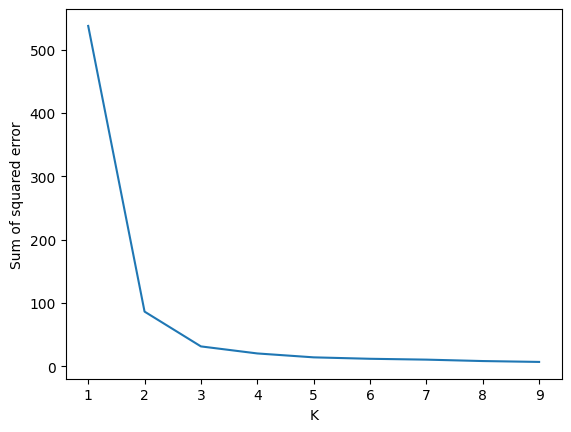

In [13]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)